##### Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
* Deep Learning

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

11490434/11490434 [==============================] - 2s 0us/step


Text(0.5, 1.0, '0')

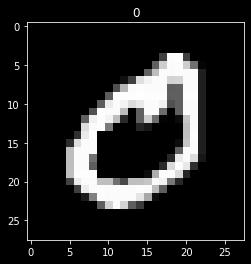

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de Saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável histórico temos os histórico das execuções (erro e accuracy)
modelo.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)
historico = modelo.fit(
    X_treinamento, y_treinamento, epochs = 36, validation_data = (X_teste, y_teste)
)

Epoch 1/36
1875/1875 [==============================] - 43s 10ms/step - loss: 0.4458 - accuracy: 0.8628 - val_loss: 0.1715 - val_accuracy: 0.9472
Epoch 2/36
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.1322 - val_accuracy: 0.9611
Epoch 3/36
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1855 - accuracy: 0.9466 - val_loss: 0.1113 - val_accuracy: 0.9669
Epoch 4/36
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1643 - accuracy: 0.9526 - val_loss: 0.1085 - val_accuracy: 0.9658
Epoch 5/36
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1475 - accuracy: 0.9568 - val_loss: 0.1031 - val_accuracy: 0.9708
Epoch 6/36
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1345 - accuracy: 0.9606 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 7/36
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1298 - accuracy: 0.9618 - val_loss: 0.1038 -

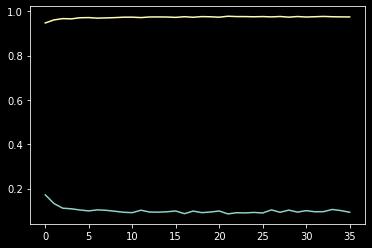

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 3ms/step


array([[1.19482451e-14, 2.48552027e-07, 1.01730279e-06, ...,
        9.99997377e-01, 5.14263653e-13, 1.21807352e-06],
       [8.49907523e-15, 3.71937077e-08, 1.00000000e+00, ...,
        3.57318641e-09, 1.11300115e-10, 8.24689404e-15],
       [2.09163009e-13, 9.99999046e-01, 2.77124155e-08, ...,
        8.74280275e-08, 7.30789907e-07, 2.00234873e-09],
       ...,
       [9.12506182e-12, 2.46456688e-10, 4.66034766e-09, ...,
        1.56893805e-08, 4.67077280e-11, 9.74216164e-06],
       [2.24390670e-18, 1.01509307e-15, 2.63863072e-16, ...,
        9.23635000e-18, 1.01077514e-11, 2.52444719e-14],
       [9.67824820e-10, 1.87318435e-15, 3.65469504e-08, ...,
        6.95529161e-15, 4.27457202e-12, 5.38567942e-13]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    0,    2,    0,    0,    1,    2,    0,    3,    1],
       [   0, 1125,    3,    3,    0,    1,    2,    0,    1,    0],
       [   3,    0, 1014,    2,    1,    0,    2,    6,    4,    0],
       [   0,    1,    5,  983,    0,   10,    0,    4,    0,    7],
       [   1,    0,    4,    0,  951,    0,    3,    3,    2,   18],
       [   2,    0,    0,    6,    1,  870,    5,    1,    4,    3],
       [   8,    3,    4,    0,    4,    5,  930,    0,    4,    0],
       [   2,    7,   12,    2,    2,    0,    0,  995,    1,    7],
       [  10,    1,    6,    5,    6,    6,    1,    3,  933,    3],
       [   4,    5,    0,   10,    7,    5,    0,    3,    2,  973]],
      dtype=int64)

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# previsão
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 264ms/step


[4]